In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [247]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [248]:
all_matches = matches[(matches['team1'].isin(['Kolkata Knight Riders', 'Chennai Super Kings'])) & (matches['team2'].isin(['Kolkata Knight Riders', 'Chennai Super Kings']))]

In [249]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [250]:
sub_data = data[(data['team1'].isin(['Kolkata Knight Riders', 'Chennai Super Kings'])) & (data['team2'].isin(['Kolkata Knight Riders', 'Chennai Super Kings']))]

### Who will win the match??

In [251]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
70,71,2008,Chennai,4/26/2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
102,103,2008,Kolkata,5/18/2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
165,166,2009,Centurion,5/18/2009,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,7,BJ Hodge,SuperSport Park,SJA Taufel,RB Tiffin,NaN
181,182,2010,Kolkata,3/16/2010,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
221,222,2010,Chennai,4/13/2010,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,R Ashwin,"MA Chidambaram Stadium, Chepauk",SS Hazare,SJA Taufel,NaN


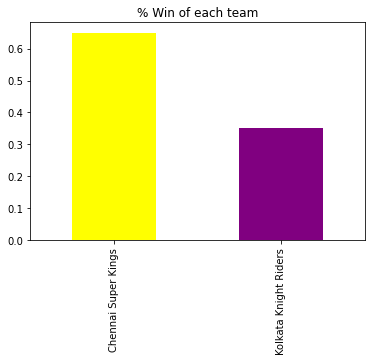

In [252]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team', color=['Yellow', 'Purple'])

In [253]:
match_id_1 = all_matches.groupby('season')['id'].unique().apply(lambda x : x[0]).values.tolist()
match_id_2 = all_matches.groupby('season')['id'].unique().apply(lambda x : x[1] if len(x)>1 else x[0]).values.tolist()

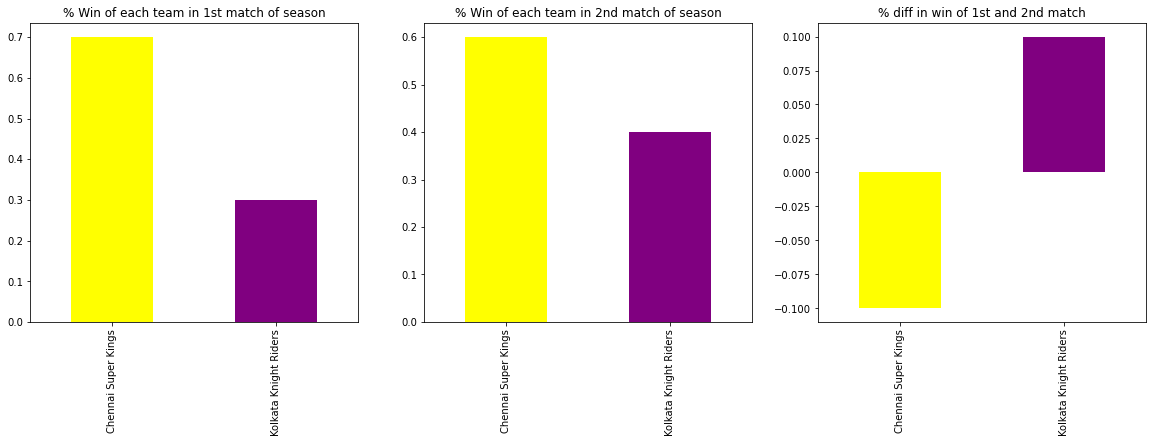

In [254]:
plt.subplot(1, 3 ,1)
all_matches[all_matches['id'].isin(match_id_1)]['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team in 1st match of season', figsize=(20,5.5), color = ['Yellow', 'Purple'])

plt.subplot(1, 3, 2)
all_matches[all_matches['id'].isin(match_id_2)]['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team in 2nd match of season', color = ['Yellow', 'Purple'])

plt.subplot(1, 3, 3)
(all_matches[all_matches['id'].isin(match_id_2)]['winner'].value_counts(normalize=True) - all_matches[all_matches['id'].isin(match_id_1)]['winner'].value_counts(normalize=True)).plot.bar(title='% diff in win of 1st and 2nd match', color = ['Yellow', 'Purple'])

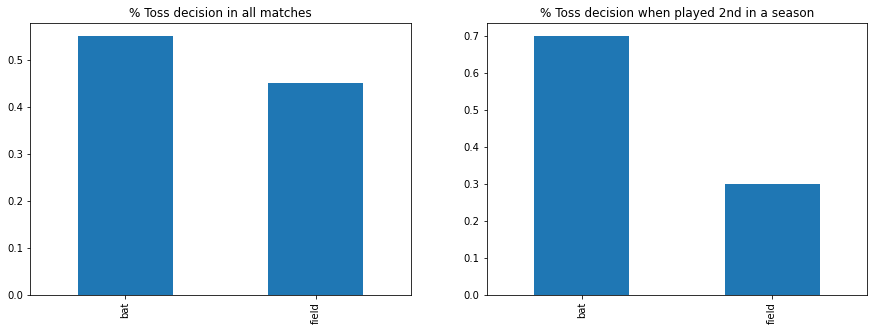

In [255]:
plt.subplot(1, 2, 1)
all_matches['toss_decision'].value_counts(normalize=True).plot.bar(title='% Toss decision in all matches', figsize=(15,5))

plt.subplot(1, 2, 2)
all_matches[all_matches['id'].isin(match_id_1)]['toss_decision'].value_counts(normalize=True).plot.bar(title='% Toss decision when played 2nd in a season')

In [256]:
all_matches.groupby(['toss_decision', 'toss_winner'])['winner'].value_counts()

toss_decision  toss_winner            winner               
bat            Chennai Super Kings    Kolkata Knight Riders    4
                                      Chennai Super Kings      3
               Kolkata Knight Riders  Chennai Super Kings      4
field          Chennai Super Kings    Chennai Super Kings      4
               Kolkata Knight Riders  Kolkata Knight Riders    3
                                      Chennai Super Kings      2
Name: winner, dtype: int64

In [257]:
all_matches.groupby([
    'id', 'winner'])['player_of_match'].unique()

id     winner               
71     Chennai Super Kings           [JDP Oram]
103    Chennai Super Kings            [M Ntini]
166    Kolkata Knight Riders         [BJ Hodge]
182    Chennai Super Kings           [MS Dhoni]
222    Chennai Super Kings           [R Ashwin]
235    Chennai Super Kings         [S Anirudha]
281    Kolkata Knight Riders    [Iqbal Abdulla]
347    Kolkata Knight Riders        [G Gambhir]
368    Chennai Super Kings         [MEK Hussey]
381    Kolkata Knight Riders         [MS Bisla]
406    Chennai Super Kings          [RA Jadeja]
418    Chennai Super Kings         [MEK Hussey]
478    Chennai Super Kings          [RA Jadeja]
504    Kolkata Knight Riders       [RV Uthappa]
527    Kolkata Knight Riders       [AD Russell]
547    Chennai Super Kings           [DJ Bravo]
7898   Chennai Super Kings        [SW Billings]
7926   Kolkata Knight Riders        [SP Narine]
11314  Chennai Super Kings          [DL Chahar]
11320  Chennai Super Kings        [Imran Tahir]
Name: playe

In [258]:
sub_data.groupby(['match_id', 'winner', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

match_id  winner                 batsman    
418       Chennai Super Kings    MEK Hussey     95
                                 MS Bisla       92
381       Kolkata Knight Riders  MS Bisla       89
7898      Chennai Super Kings    AD Russell     89
11320     Chennai Super Kings    CA Lynn        84
166       Kolkata Knight Riders  BB McCullum    81
527       Kolkata Knight Riders  RV Uthappa     80
222       Chennai Super Kings    SK Raina       78
381       Kolkata Knight Riders  SK Raina       73
103       Chennai Super Kings    Salman Butt    73
Name: batsman_runs, dtype: int64

In [259]:
sub_data.groupby(['match_id', 'winner', 'bowler'])['player_dismissed'].count().sort_values(ascending=False).head(10)

match_id  winner                 bowler         
527       Kolkata Knight Riders  GB Hogg            4
11320     Chennai Super Kings    Imran Tahir        4
478       Chennai Super Kings    RA Jadeja          4
103       Chennai Super Kings    M Ntini            4
222       Chennai Super Kings    R Ashwin           3
11320     Chennai Super Kings    SN Thakur          3
182       Chennai Super Kings    JM Kemp            3
11314     Chennai Super Kings    DL Chahar          3
                                 Harbhajan Singh    3
547       Chennai Super Kings    DJ Bravo           3
Name: player_dismissed, dtype: int64

### How many bowls more or less KKR will take to reach a total score of 75 as compared to CSK

In [260]:
def Count(df):
    balls = 0
    runs = 0
    for i in df.total_runs:
        if runs >= 75:
            break
        else:
            runs += i
            balls += 1
    return balls

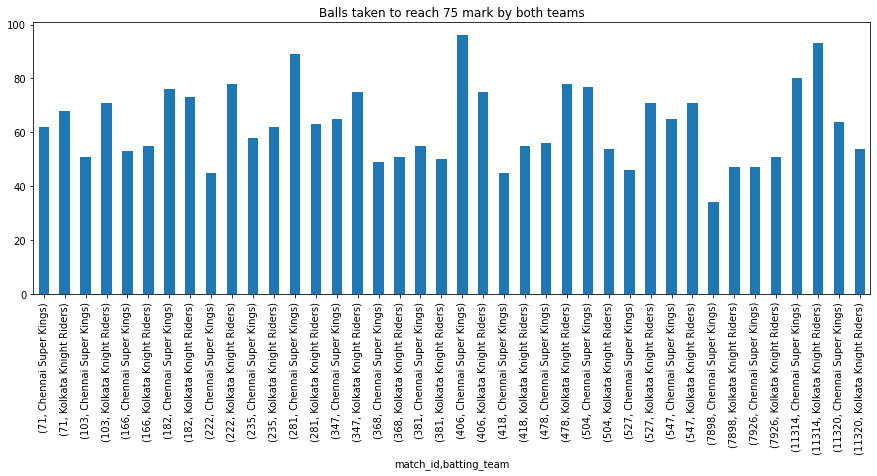

In [261]:
sub_data.groupby(['match_id', 'batting_team']).apply(Count).plot.bar(title='Balls taken to reach 75 mark by both teams', figsize=(15,5))

In [262]:
sub_data.groupby(['match_id', 'batting_team']).apply(Count).groupby('batting_team').mean()

batting_team
Chennai Super Kings      60.65
Kolkata Knight Riders    64.75
dtype: float64

In [263]:
sub_data[(sub_data['match_id'].isin(match_id_1)) & (sub_data['season']>2015)].groupby(['match_id', 'batting_team']).apply(Count).groupby('batting_team').mean()

batting_team
Chennai Super Kings      57
Kolkata Knight Riders    70
dtype: int64

In [264]:
sub_data1 = sub_data[(sub_data['over']>=1) & (sub_data['over']<=10) & (sub_data['season']>2015)]

In [265]:
sub_data1.groupby(['batsman', 'non_striker'])['total_runs'].sum().sort_values(ascending=False).head()

batsman       non_striker 
CA Lynn       SP Narine       52
F du Plessis  SR Watson       51
SR Watson     F du Plessis    44
              AT Rayudu       42
AT Rayudu     SR Watson       33
Name: total_runs, dtype: int64

In [266]:
sub_data1.groupby(['match_id', 'batting_team'])['player_dismissed'].count().groupby('batting_team').mean()

batting_team
Chennai Super Kings      2.0
Kolkata Knight Riders    3.5
Name: player_dismissed, dtype: float64

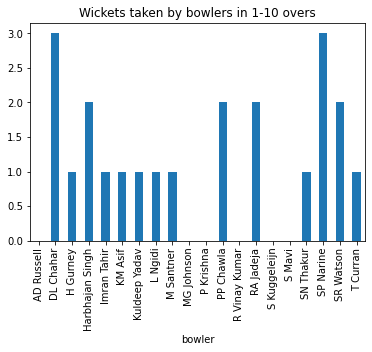

In [267]:
sub_data1.groupby('bowler')['player_dismissed'].count().plot.bar(title='Wickets taken by bowlers in 1-10 overs')

### How many balls will Deepak Chahar take, to get his first wicket??

In [268]:
def first_wicket(df):
    balls = 1
    
    for i in df.player_dismissed_bool:
        if i == 0:
            balls += 1
        else:
            break
    return balls

In [269]:
sub_data2 = data[(data['bowler']=='DL Chahar') & (sub_data2['noball_runs']==0) & (sub_data2['wide_runs']==0)]

In [270]:
sub_data3 = sub_data[(sub_data['bowler']=='DL Chahar') & (sub_data2['noball_runs']==0) & (sub_data2['wide_runs']==0)]

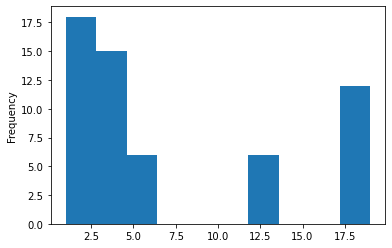

In [271]:
sub_data3['over'].plot.hist()

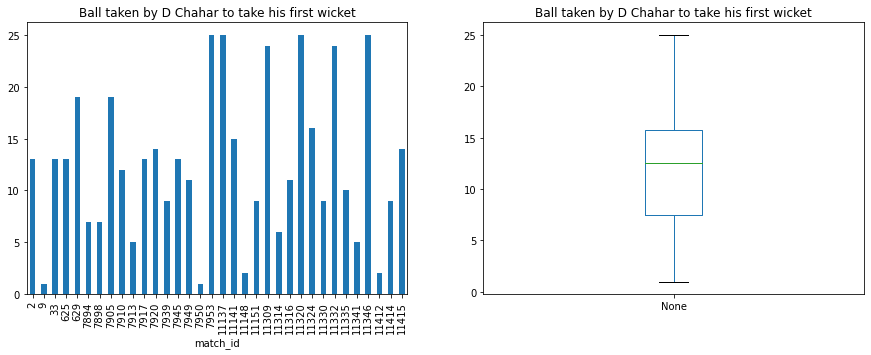

In [272]:
plt.subplot(1, 2, 1)
sub_data2.groupby(['match_id']).apply(first_wicket).plot.bar(title='Ball taken by D Chahar to take his first wicket', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data2.groupby(['match_id']).apply(first_wicket).plot.box(title='Ball taken by D Chahar to take his first wicket')

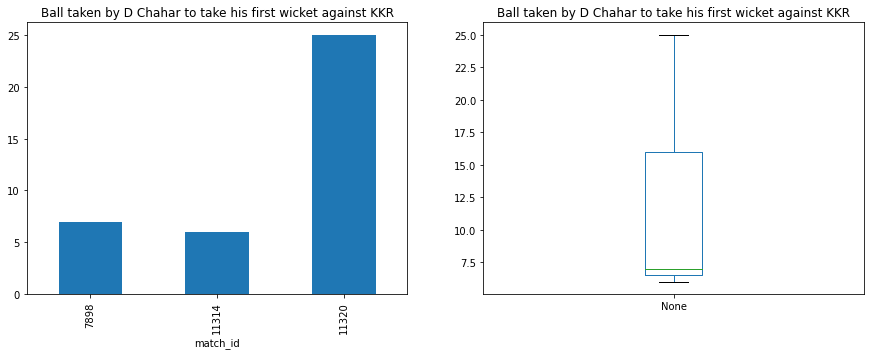

In [273]:
plt.subplot(1, 2, 1)
sub_data3.groupby(['match_id']).apply(first_wicket).plot.bar(title='Ball taken by D Chahar to take his first wicket against KKR', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data3.groupby(['match_id']).apply(first_wicket).plot.box(title='Ball taken by D Chahar to take his first wicket against KKR')

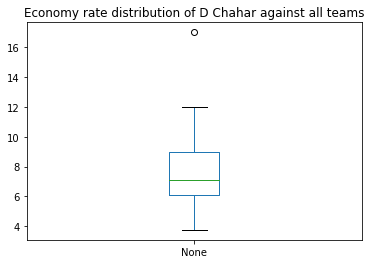

In [274]:
(sub_data2.groupby(['match_id'])['total_runs'].sum()/sub_data2.groupby(['match_id'])['over'].unique().apply(lambda x : len(x))).plot.box(title='Economy rate distribution of D Chahar against all teams')

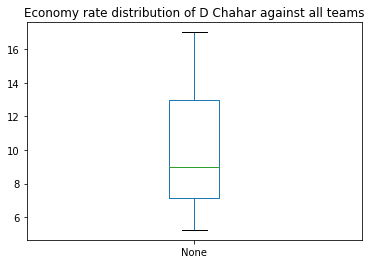

In [275]:
(sub_data3.groupby(['match_id'])['total_runs'].sum()/sub_data3.groupby(['match_id'])['over'].unique().apply(lambda x : len(x))).plot.box(title='Economy rate distribution of D Chahar against all teams')

In [276]:
sub_data3.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

batsman
CA Lynn       36
SP Narine     17
RV Uthappa     8
AD Russell     6
S Gill         2
PP Chawla      2
KD Karthik     2
N Rana         0
Name: batsman_runs, dtype: int64

In [277]:
sub_data3.groupby('batsman')['player_dismissed'].count().sort_values(ascending=False)

batsman
RV Uthappa    1
N Rana        1
CA Lynn       1
SP Narine     0
S Gill        0
PP Chawla     0
KD Karthik    0
AD Russell    0
Name: player_dismissed, dtype: int64

### How many such overs will be there in a match where 6 and 4 are scored in the same match??

In [278]:
sub_data['is_four'] = sub_data['batsman_runs'].apply(lambda x : 1 if x in [4, 5] else 0)

In [279]:
sub_data['is_six'] = sub_data['batsman_runs'].apply(lambda x : 1 if x in [6, 7] else 0)

In [280]:
dummy = pd.DataFrame(sub_data.groupby(['match_id', 'over'])['is_four', 'is_six'].sum())

In [281]:
dummy = dummy[(dummy['is_four']>=1) & (dummy['is_six']>=1)]

In [282]:
dummy_index = dummy.index

In [283]:
dummy.reset_index(inplace=True)

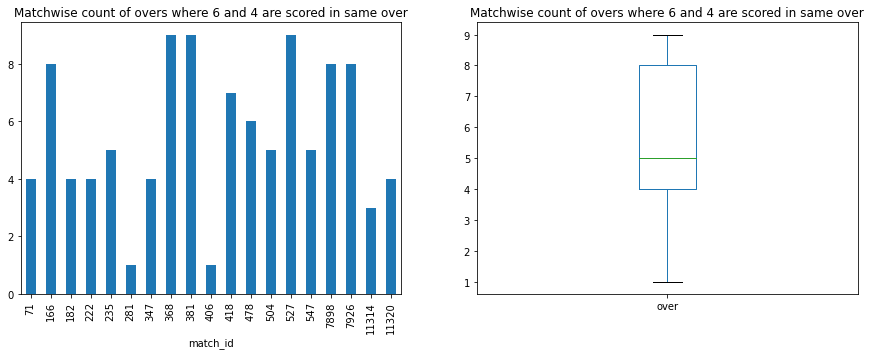

In [313]:
plt.subplot(1, 2, 1)
dummy.groupby('match_id')['over'].count().plot.bar(title='Matchwise count of overs where 6 and 4 are scored in same over', figsize=(15,5))

plt.subplot(1, 2, 2)
dummy.groupby('match_id')['over'].count().plot.box(title='Matchwise count of overs where 6 and 4 are scored in same over')

In [301]:
dummy1 = pd.DataFrame(sub_data[sub_data['season']>2015].groupby(['match_id', 'bowler', 'batsman', 'over'])['is_four', 'is_six'].sum())

In [302]:
dummy1[(dummy1['is_four']>=1) & (dummy1['is_six']>=1)]

is_four  is_six
match_id bowler        batsman    over                 
7898     Kuldeep Yadav MS Dhoni   14          1       1
         PP Chawla     AT Rayudu  4           1       2
                       SR Watson  2           1       1
         R Vinay Kumar SR Watson  1           2       1
         T Curran      SR Watson  6           1       1
7926     MG Johnson    SR Watson  5           1       1
11314    PP Chawla     SR Watson  1           1       1
         S Kuggeleijn  AD Russell 20          2       1
11320    DL Chahar     CA Lynn    3           2       1
         Imran Tahir   AD Russell 15          1       1
         Kuldeep Yadav KM Jadhav  11          1       1
         PP Chawla     SK Raina   14          1       1

### How many no-balls will be bowled in the match??

In [309]:
sub_data4 = sub_data[(sub_data['noball_runs']!=0) & (sub_data['season']>2015)]

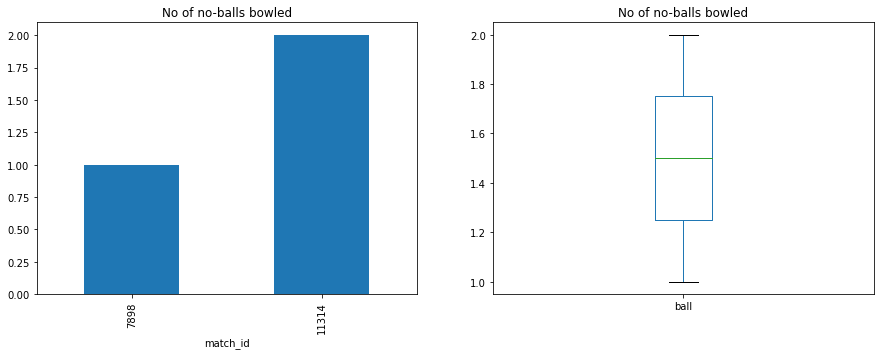

In [310]:
plt.subplot(1, 2, 1)
sub_data4.groupby('match_id')['ball'].count().plot.bar(title='No of no-balls bowled', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data4.groupby('match_id')['ball'].count().plot.box(title='No of no-balls bowled')

In [311]:
sub_data4.groupby('bowler')['ball'].count()

bowler
H Gurney         1
P Krishna        1
R Vinay Kumar    1
Name: ball, dtype: int64